<a href="https://colab.research.google.com/github/srijanparia/Handwritten-Digits-Classification-using-NN/blob/main/Handwritten_digits_classification_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
x_train[0].shape

(28, 28)

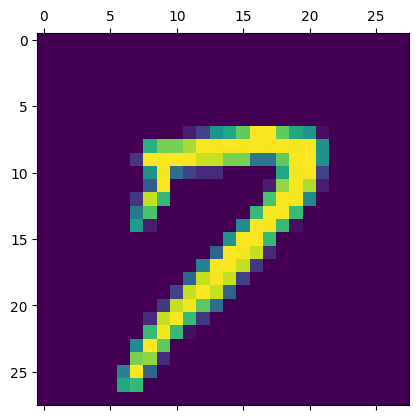

In [8]:
plt.matshow(x_train[599])

In [9]:
y_train[599]

7

In [10]:
len(y_train)

60000

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train /255
x_test = x_test / 255

In [13]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [14]:
x_train_flattened.shape

(60000, 784)

In [15]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.4698 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3043 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2736 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9262


In [17]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.9273


[0.2646987736225128, 0.927299976348877]

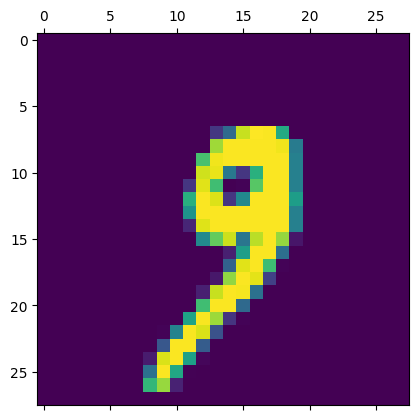

In [18]:
plt.matshow(x_test[1000])

In [19]:
y_predict = model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_predict[10]

array([9.9871087e-01, 1.3576104e-07, 5.3702033e-01, 7.4483290e-02,
       1.0186910e-04, 8.1153482e-01, 2.7169021e-02, 3.3499757e-05,
       6.0308307e-01, 4.5076161e-04], dtype=float32)

In [21]:
np.argmax(y_predict[1000])

9

In [22]:
y_predicted_labels = [ np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    1,    0,    5,    6,    4,    2,    0],
       [   0, 1112,    4,    1,    0,    1,    4,    2,   11,    0],
       [   5,    8,  938,    9,    6,    3,   11,   11,   37,    4],
       [   3,    0,   27,  896,    0,   36,    2,   14,   24,    8],
       [   2,    1,    5,    1,  910,    0,    8,    5,    9,   41],
       [   8,    3,    4,   17,    9,  791,   13,    7,   33,    7],
       [  13,    3,   10,    1,    8,   13,  905,    2,    3,    0],
       [   1,    5,   24,    2,    5,    1,    0,  963,    2,   25],
       [   7,    8,    7,   16,    9,   21,    8,   11,  878,    9],
       [  11,    7,    1,    9,   24,    8,    0,   24,    5,  920]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

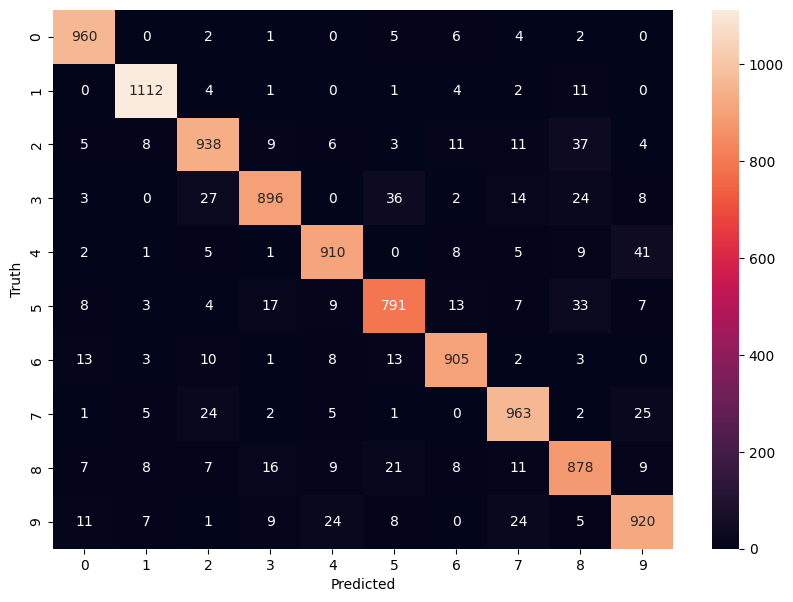

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #Hidden Layer_1
    keras.layers.Dense(50, activation='relu'), #Hidden Layer_2
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2650 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1127 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0821 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0611 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9847


In [26]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9707


[0.10232298821210861, 0.9707000255584717]

In [27]:
y_predict = model.predict(x_test_flattened)
y_predicted_labels = [ np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

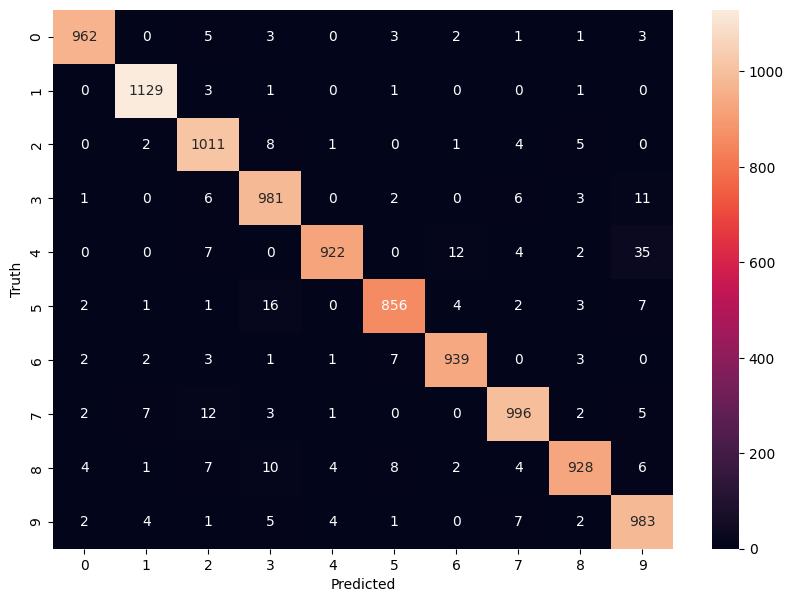

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')